In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [77]:
df = pd.read_csv("../dataset/diabetes.csv")

In [79]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

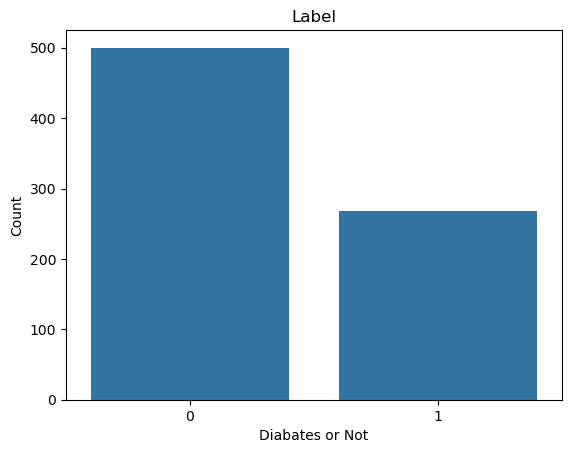

In [83]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabates or Not")
plt.ylabel("Count")
plt.title("Label")

In [85]:
# 레이블 갯수 확인 (숫자) * 중요
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [87]:
# 결측치 확인
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [89]:
# 결측치 제거
# Outcome 열을 제외한 나머지 열에서 0이 포함된 행을 제거
#  df = df[(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]
df = df[(df[['Glucose', 'BloodPressure', 'SkinThickness',  'BMI']] != 0).all(axis=1)]

# 결과 출력
print(df.shape)  # 0 값이 제거된 후의 데이터 크기 확인

(532, 9)


In [91]:
df['Outcome'].value_counts()

Outcome
0    355
1    177
Name: count, dtype: int64

In [93]:
(df == 0).sum()

Pregnancies                  77
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     140
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     355
dtype: int64

In [95]:
# X와 y로 분리
X = df.drop(columns='Outcome')
y = df['Outcome']

In [97]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [112]:
from tensorflow.keras import layers, models

# CNN 모델 구성
model = models.Sequential()

# 입력 데이터에 차원 추가 (CNN은 3D 데이터를 처리)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# 1D CNN 층 추가
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5225 - loss: 0.6854 - val_accuracy: 0.6822 - val_loss: 0.6147
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7221 - loss: 0.6009 - val_accuracy: 0.7196 - val_loss: 0.5421
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7435 - loss: 0.5398 - val_accuracy: 0.7477 - val_loss: 0.5034
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.5088 - val_accuracy: 0.7477 - val_loss: 0.4825
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7475 - loss: 0.5194 - val_accuracy: 0.7570 - val_loss: 0.4807
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.4921 - val_accuracy: 0.7570 - val_loss: 0.4753
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7519 - loss: 0.4967 - val_accuracy: 0.7664 - val_loss: 0.4706
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7577 - loss: 0.4890 - val_accuracy: 0.7944 - val_loss: 0.4732
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4232 
Test accuracy: 0.8037382960319519


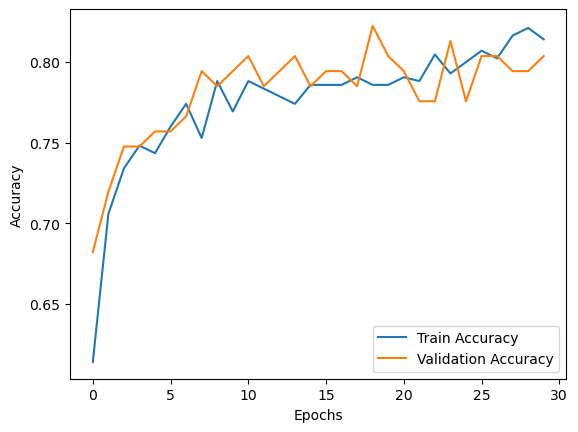

In [114]:
import matplotlib.pyplot as plt

# 모델 평가
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f'Test accuracy: {test_acc}')

# 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [118]:
# 모델 저장
model.save('diabetes_cnn_model.keras')
print("모델이 저장되었습니다.")

모델이 저장되었습니다.
